In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, 
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

df['ChurnFlag'] = df['Churn'].map({'Yes':1,'No':0})

df_enc = pd.get_dummies(df.drop(columns=['Churn']), columns=cat_cols, drop_first=True)

X = df_enc.drop(columns=['ChurnFlag'])
y = df_enc['ChurnFlag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("✅ Dataset ready for modeling")


✅ Dataset ready for modeling


In [3]:
scaler = StandardScaler()
num_features = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

print("✅ Numeric features scaled")


✅ Numeric features scaled


In [4]:
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_clf.fit(X_train_scaled, y_train)

y_pred_log = log_clf.predict(X_test_scaled)
y_proba_log = log_clf.predict_proba(X_test_scaled)[:,1]

print("✅ Logistic Regression model trained")


✅ Logistic Regression model trained


In [5]:
rf_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:,1]

print("✅ Random Forest model trained")


✅ Random Forest model trained


In [6]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true,y_pred))
    print("Precision:", precision_score(y_true,y_pred))
    print("Recall:", recall_score(y_true,y_pred))
    print("F1-score:", f1_score(y_true,y_pred))
    print("ROC-AUC:", roc_auc_score(y_true,y_proba))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true,y_pred))
    print("\nClassification Report:\n", classification_report(y_true,y_pred))

print("✅ Evaluation function ready")


✅ Evaluation function ready


In [7]:
evaluate_model(y_test, y_pred_log, y_proba_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")



--- Logistic Regression ---
Accuracy: 0.750709823963657
Precision: 0.5195530726256983
Recall: 0.7965738758029979
F1-score: 0.628909551986475
ROC-AUC: 0.8460445012229065

Confusion Matrix:
 [[950 344]
 [ 95 372]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.52      0.80      0.63       467

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761


--- Random Forest ---
Accuracy: 0.7881885292447472
Precision: 0.6350574712643678
Recall: 0.4732334047109208
F1-score: 0.5423312883435583
ROC-AUC: 0.8295534653432579

Confusion Matrix:
 [[1167  127]
 [ 246  221]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.47      0.54       467

    accuracy                     

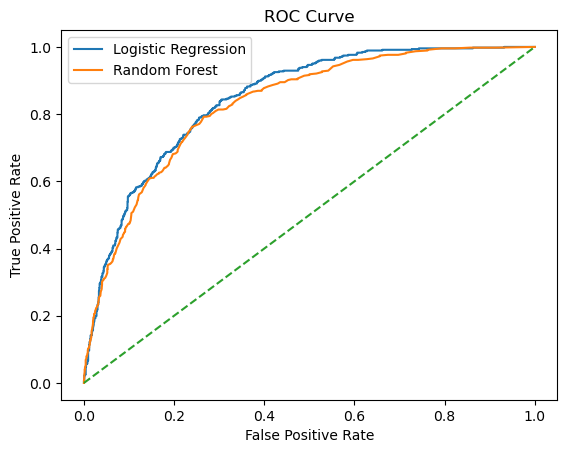

In [8]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
